<a href="https://colab.research.google.com/github/Jacob-h-v/HandingRepoMed6/blob/main/PredictingWIneQualityJHV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup and Data Retrieval



Setting up the environment by loading in data and dependencies.

In [ ]:
# Installing dependencies
# !pip install ucimlrepo

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy import stats

Since we can intuitively deduce that red and white whines have significantly differing sensory properties, let's keep them separate.

In [ ]:
# Load in the data (code for getting data provided by UCI)

# Loading red and white wines data separately
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Load red wine data into a pandas dataframe
red_wine_df = pd.read_csv(red_wine_url, delimiter=";")

# Load white wine data into a pandas dataframe
white_wine_df = pd.read_csv(white_wine_url, delimiter=";")

# Concatenating the data in case a combined overview becomes useful
wine_df = pd.concat([red_wine_df, white_wine_df], axis=0).reset_index(drop=True)


According to UCI's archive website, the dataset should have no missing values. Let's verify that for good measure.

In [ ]:
# Check for missing values
print("Red wine missing values:")
print(red_wine_df.isnull().sum())

print("\nWhite wine missing values:")
print(white_wine_df.isnull().sum())

Red wine missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

White wine missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Exploring the Data

Let's inspect the dataframes

In [ ]:
# Inspecting the structure of each dataframe
#wine_df.head()
#red_wine_df.head()
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#wine_df.info()
#red_wine_df.info()
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#wine_df.describe()
#red_wine_df.describe()
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Let's also plot a histogram of each of the numerical attributes to get a visual representation of how they are distributed and to look for significant skewness.

<Figure size 2000x1500 with 0 Axes>

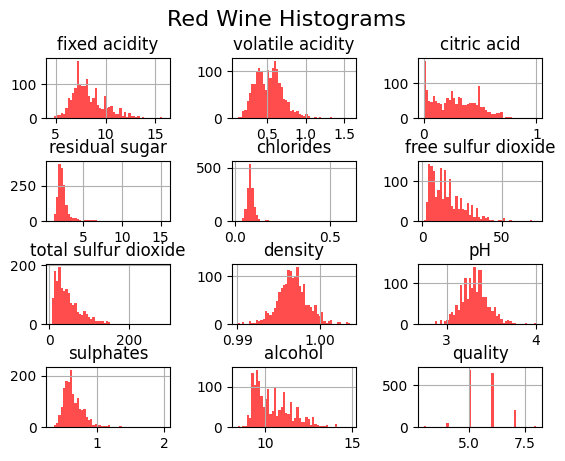

<Figure size 2000x1500 with 0 Axes>

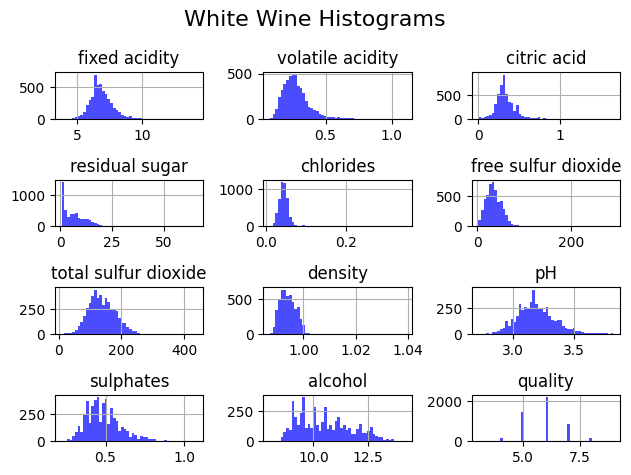

In [ ]:
# Plotting histograms using matplotlib

# Creating a figure for red wine histograms
plt.figure(figsize=(20, 15))
red_wine_df.hist(bins=50, color='red', alpha=0.7)
plt.suptitle('Red Wine Histograms', fontsize=16)

# Adjust spacing for red wine histograms
plt.subplots_adjust(hspace=0.7, wspace=0.5)

# Creating a figure for white wine histograms
plt.figure(figsize=(20, 15))
white_wine_df.hist(bins=50, color='blue', alpha=0.7)
plt.suptitle('White Wine Histograms', fontsize=16)

# Adjust spacing for white wine histograms
plt.subplots_adjust(hspace=0.7, wspace=0.5)

# Show both figures
plt.tight_layout()
plt.show()

As evidenced by the above histograms, there seems to be some right-skewed features. Some of these features also have long tails. We may have to do some transformations on these features to normalize them and make them more symmetric before using them to train a model. These transformations should, however, be done after splitting the data into training, validation and test sets so that the transformations are fitted only to the training data, preventing information leakage into the validation and test sets.

Taking a closer look at visualizing the target variables.

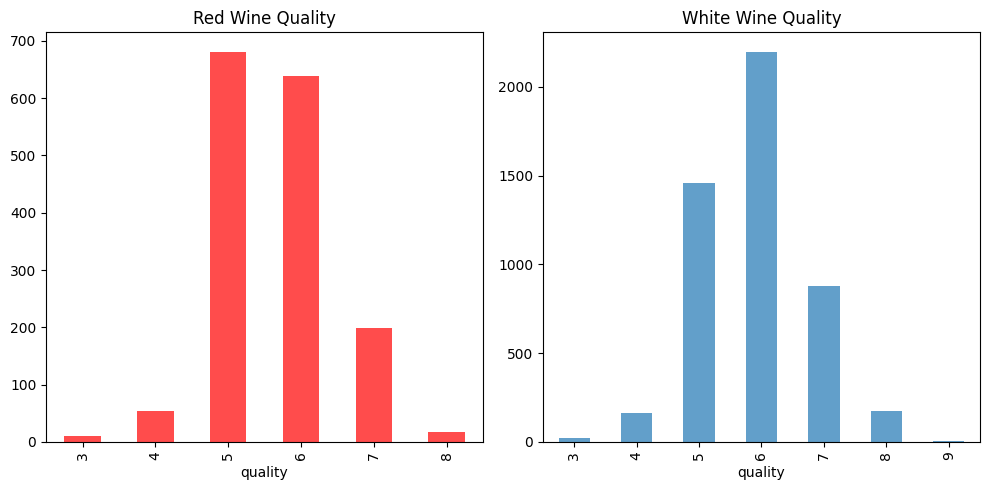

In [ ]:
# Preparing a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) # (1 row, two columns, ie. side by side)

# Creating the subplots
red_wine_df['quality'].value_counts().sort_index().plot(kind="bar", color="red", alpha=0.7, ax=ax1, title="Red Wine Quality")

white_wine_df['quality'].value_counts().sort_index().plot(kind="bar", alpha=0.7, ax=ax2, title="White Wine Quality")

# Display the combined figure
plt.tight_layout()
plt.show()

As seen in the plots generated by the above code, it seems like the target variables are both more or less normally distributed, but there seems to be no observations of wines with a quality of 10, or less than 3. However, there appears to be significantly more observations in the white whine data set.

Let's look at which features correlate the most with the wine's quality.

In [ ]:
# Correlation matrix for red wine
corr_matrix_red = red_wine_df.corr()
corr_matrix_red["quality"].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


In [ ]:
# Correlation matrix for white wine
corr_matrix_white = white_wine_df.corr()
corr_matrix_white["quality"].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.435575
pH,0.099427
sulphates,0.053678
free sulfur dioxide,0.008158
citric acid,-0.009209
residual sugar,-0.097577
fixed acidity,-0.113663
total sulfur dioxide,-0.174737
volatile acidity,-0.194723


The alcohol content of both types of wine seems to be significantly correlated with the wine's quality. We also see some negative correlations, though those differ more between the wine types. Where volatile acidite seems to have a notable negative impact the quality of red wine, it looks like the correlation is less strong for white wines where, on the other hand, we see that denser white wines generally seem to be of lower quality. Finally, there are some features with very low r-scores that we may want to either exclude, or include in other features by ways of dimensionality reduction.

Let's also visualize the correlations between features using heatmaps. This may also reveal potential feature pairings with significant correlations to the wine's quality.

Text(0.5, 1.0, 'Red Wine Feature Correlations')

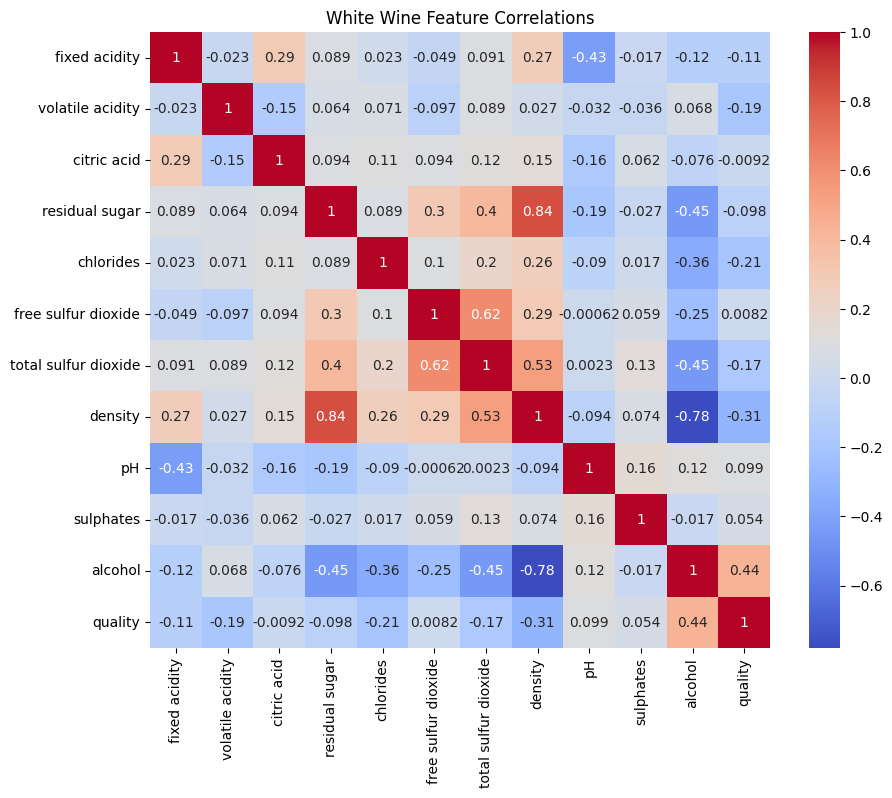

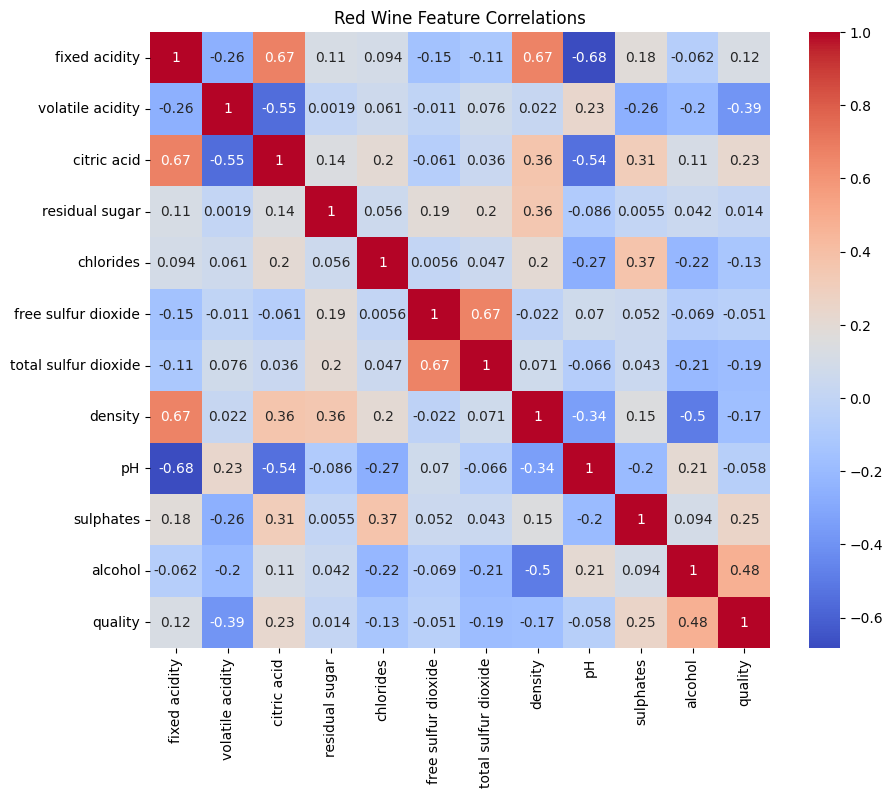

In [ ]:
# Correlation matrix for white wine
plt.figure(figsize=(10, 8))
sns.heatmap(white_wine_df.corr(), annot=True, cmap="coolwarm")
plt.title("White Wine Feature Correlations")

# Correlation matrix for red wine
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine_df.corr(), annot=True, cmap="coolwarm")
plt.title("Red Wine Feature Correlations")

There seems to be a high correlation between residual sugar contents and density for white wines, which indicates redundancy ie. they point towards the same conclusion. Alcohol levels and density seem to also be highly correlated for white wines, whereas both of these feature combinations are only weakly or moderately correlated for red wines. Also, there seems to be a moderately high correlation between free sulfur dioxide and total sulfur dioxide for both red and white wines, which makes logical sense.

For both types of wine, it may be beneficial to look into combining free sulfur dioxide and total sulfur dioxide into a single feature, perhaps by subtracting free sulfur dioxide from the total amount to get the amount of bound sulfur dioxide. Furthermore, running principal component analysis could reduce the dimensionality of the data set without losing much information, since there are multiple highly correlated features. Finally, we may want to remove some features with very low correlations to quality, especially for the red wine data set. We will return to this in the data preprocessing section.

Let's create box plots to get a different perspective. These should allow us to more easily identify outliers.

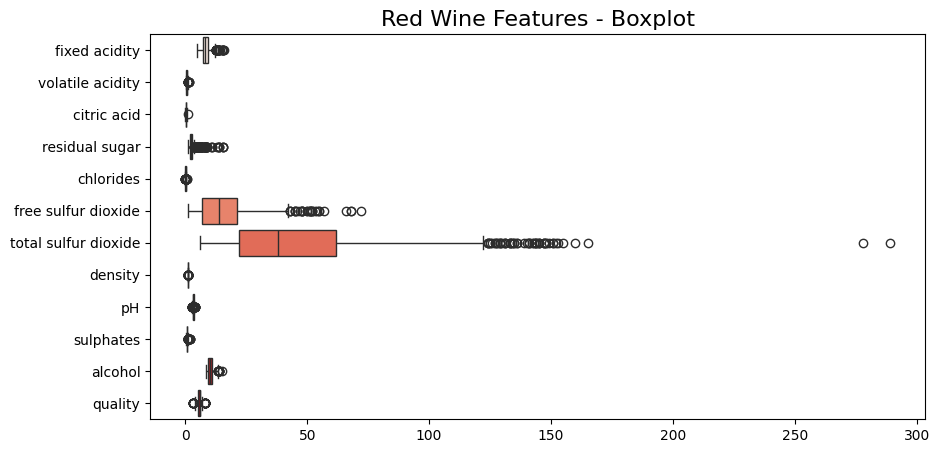

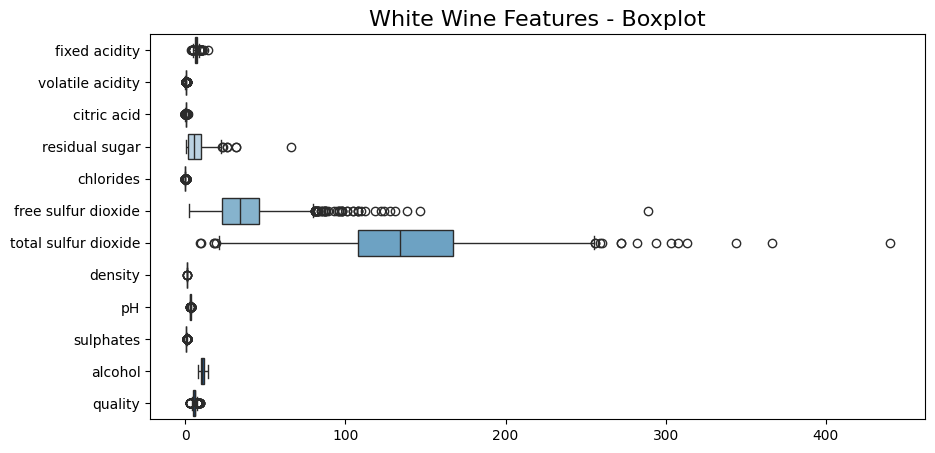

In [ ]:
# Boxplots for red wine features
plt.figure(figsize=(10, 5))
sns.boxplot(data=red_wine_df, orient="h", palette="Reds")
plt.title("Red Wine Features - Boxplot", fontsize=16)
plt.show()

# Boxplots for white wine features
plt.figure(figsize=(10, 5))
sns.boxplot(data=white_wine_df, orient="h", palette="Blues")
plt.title("White Wine Features - Boxplot", fontsize=16)
plt.show()

As expected, the above boxplots reveal some notable outliers, especially pertaining to sulfur dioxide and sugar concentrations. We will need to keep this in mind when working with the data.

# Preprocessing the Data

Let's do a train-validation-test split next. Since we're not expecting updates to the data while developing the model, simply seeding the random number generator should be fine, whereas doing so with a data set that gets frequently updated would break the seeding when the data set is updated. In this case we will be doing a 70-20-10 split, since the dataset is not massive, and we would like to have a large enough validation set that we can comfortably tune hyperparameters without overfitting the model.

In [ ]:
# Splitting the red and white wine sets into training set, validation set and test set
white_train_set, white_validation_set, white_test_set = np.split(white_wine_df.sample(frac=1, random_state=42), [int(.7*len(white_wine_df)), int(.9*len(white_wine_df))])

red_train_set, red_validation_set, red_test_set = np.split(red_wine_df.sample(frac=1, random_state=42), [int(.7*len(red_wine_df)), int(.9*len(red_wine_df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Now that the data is split into training, validation and test sets, let's make use of the knowledge we gained earlier on about the features' correlations, skewness and outliers by combining correlated features and running transformations.

## Feature Engineering

Let's start by introducing the combined feature discussed in [the "Exploring the Data" section](https://colab.research.google.com/drive/1g0MgttpWy4RfvCDXLWEwAnvDq5AkLgOB#scrollTo=sW1CBbW8MA0I&line=3&uniqifier=1), and verifying that we get positive values as expected, indicated by the checks returning a false bool. As a sidenote we could potentially save a few lines of code execution by running this operation before splitting the data sets with any impact on the final model.



In [ ]:
# Creating the new (combined) feature
white_train_set["bound sulfur dioxide"] = white_train_set["total sulfur dioxide"] - white_train_set["free sulfur dioxide"]
white_validation_set["bound sulfur dioxide"] = white_validation_set["total sulfur dioxide"] - white_validation_set["free sulfur dioxide"]
white_test_set["bound sulfur dioxide"] = white_test_set["total sulfur dioxide"] - white_test_set["free sulfur dioxide"]


red_train_set["bound sulfur dioxide"] = red_train_set["total sulfur dioxide"] - red_train_set["free sulfur dioxide"]
red_validation_set["bound sulfur dioxide"] = red_validation_set["total sulfur dioxide"] - red_validation_set["free sulfur dioxide"]
red_test_set["bound sulfur dioxide"] = red_test_set['total sulfur dioxide'] - red_test_set['free sulfur dioxide']

# Verify that there are no negative values or cases where there was somehow registered more free sulfur dioxide than total sulfur dioxide
# (if none of these conditions are true, the below code should return false)
print("White wine bound sulfur dioxide contains negative values:", (white_train_set['bound sulfur dioxide'] < 0).any())
print("Red wine bound sulfur dioxide contains negative values:", (red_train_set['bound sulfur dioxide'] < 0).any())

print("White wine bound sulfur dioxide > than total sulfur dioxide:", (white_train_set["bound sulfur dioxide"] > white_train_set["total sulfur dioxide"]).any())
print("Red wine bound sulfur dioxide > than total sulfur dioxide:", (red_train_set["bound sulfur dioxide"] > red_train_set["total sulfur dioxide"]).any())

White wine bound sulfur dioxide contains negative values: False
Red wine bound sulfur dioxide contains negative values: False
White wine bound sulfur dioxide > than total sulfur dioxide: False
Red wine bound sulfur dioxide > than total sulfur dioxide: False


Now, let's plot a histogram of the new features and take a look at how it correlates with wine quality.

Text(0.5, 1.0, 'Red Wine Bound Sulfur Dioxide Histogram')

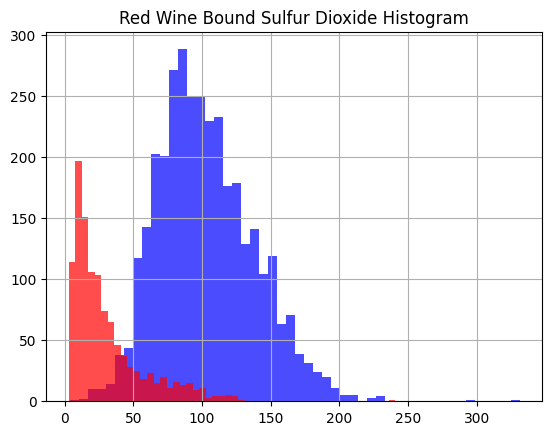

In [ ]:
# Creating a histogram of the new features
white_train_set["bound sulfur dioxide"].hist(bins=50, color="blue", alpha=0.7)
plt.title("White Wine Bound Sulfur Dioxide Histogram")

red_train_set["bound sulfur dioxide"].hist(bins=50, color="red", alpha=0.7)
plt.title("Red Wine Bound Sulfur Dioxide Histogram")

In [ ]:
print("Correlation between bound sulfur dioxide and quality (white wine):", white_train_set["bound sulfur dioxide"].corr(white_train_set["quality"]))
print("Correlation between bound sulfur dioxide and quality (red wine):", red_train_set["bound sulfur dioxide"].corr(red_train_set["quality"]))

Correlation between bound sulfur dioxide and quality (white wine): -0.21121621546380234
Correlation between bound sulfur dioxide and quality (red wine): -0.21870788432062674


As we can see, the new "bound sulfur dioxide" feature is still weakly correlated with the wine's quality, however, the correlation is stronger than either of the original features on their own.Therefore, we might consider dropping the original features from the data, effectively removing one dimension of data. Also, it seems to exhibit some right-skewedness, so we should include this new feature in the transformations done later.

In [ ]:
# Dropping original features (replaced by bound sulfur dioxide)
for df in [white_train_set, white_validation_set, white_test_set, red_train_set, red_validation_set, red_test_set]:
    try:
        df.drop(columns=["free sulfur dioxide", "total sulfur dioxide"], inplace=True)
    except KeyError:
        pass

In order to prevent the StandardScaler from simply squishing the data points into a small range, we should perform some transformations before scaling the data. In this case, we will be performing a logarithmic transformation to correct the right-skew of some of the features. These transformations should only be fitted on the training set though, so there is no unintentional information leakage. In order to deal with the most egregious outliers identified earlier, we may want to try Winsorizing, which limits extreme values to set percentiles.

In [ ]:
# Defining features for transformation (due to skewness) and winsoring (due to outliers)
skewed_features_white = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "bound sulfur dioxide", "density", "sulphates", "alcohol"]
skewed_features_red = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "bound sulfur dioxide", "sulphates", "alcohol"]

outliers_features_red = ["bound sulfur dioxide", "citric acid", "residual sugar", "chlorides", "sulphates"]
outliers_features_white = ["bound sulfur dioxide","citric acid", "sulphates", "density"]

win_limits = [0.025, 0.025]

# Applying square root transformation to the training set
for feature in skewed_features_white:
  white_train_set[feature] = np.sqrt(white_train_set[feature])

for feature in skewed_features_red:
  red_train_set[feature] = np.sqrt(red_train_set[feature])

# Apply the exact same transformation to the validation and test sets by using the distribution from the training set
for feature in skewed_features_white:
  white_validation_set[feature] = np.sqrt(white_validation_set[feature])
  white_test_set[feature] = np.sqrt(white_test_set[feature])

for feature in skewed_features_red:
  red_validation_set[feature] = np.sqrt(red_validation_set[feature])
  red_test_set[feature] = np.sqrt(red_test_set[feature])

# Winsorizing the training sets
for feature in outliers_features_white:
  white_train_set[feature] = winsorize(white_train_set[feature], limits=win_limits)

for feature in outliers_features_red:
  red_train_set[feature] = winsorize(red_train_set[feature], limits=win_limits)

#Winsorizing the validation and test sets using the same limits
for feature in outliers_features_white:
  white_validation_set[feature] = winsorize(white_validation_set[feature], limits=win_limits)
  white_test_set[feature] = winsorize(white_test_set[feature], limits=win_limits)

for feature in outliers_features_red:
  red_validation_set[feature] = winsorize(red_validation_set[feature], limits=win_limits)
  red_test_set[feature] = winsorize(red_test_set[feature], limits=win_limits)

Let's once again create histograms to visualize how the transformation has affected the features.

<Figure size 2000x1500 with 0 Axes>

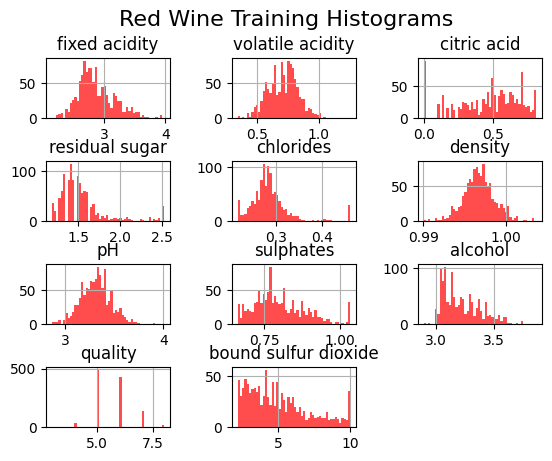

<Figure size 2000x1500 with 0 Axes>

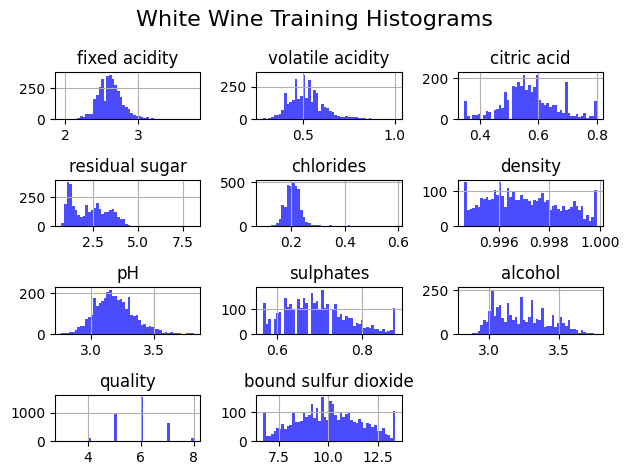

In [ ]:
# Plotting histograms for transformed features

# Creating a figure for red wine histograms
plt.figure(figsize=(20, 15))
red_train_set.hist(bins=50, color='red', alpha=0.7)
plt.suptitle('Red Wine Training Histograms', fontsize=16)

# Adjust spacing for red wine histograms
plt.subplots_adjust(hspace=0.7, wspace=0.5)

# Creating a figure for white wine histograms
plt.figure(figsize=(20, 15))
white_train_set.hist(bins=50, color='blue', alpha=0.7)
plt.suptitle('White Wine Training Histograms', fontsize=16)

# Adjust spacing for white wine histograms
plt.subplots_adjust(hspace=0.7, wspace=0.5)

# Show both figures
plt.tight_layout()
plt.show()

Judging from the above histograms we still need to add better handling for outliers.

it is time to perform standardization. The idea is, that standardizing all of the features so that their values range from -1 to 1 prevents the model from interpreting higher numbers as more important, and may help the model converge faster.

In [ ]:
# Initializing scalers for the red and white wine data sets.
# Using StandardScaler (as opposed to MinMaxScaler) to avoid distorting relative distances between data points.
red_scaler = StandardScaler()
white_scaler = StandardScaler()

# Standardizing the red wine data set, excluding the quality column, and fitting only the training set
red_training_features_scaled = red_scaler.fit_transform(red_train_set.drop("quality", axis=1))

# Using the fitted scaler to transform the red wine validation and test sets
red_validation_features_scaled = red_scaler.transform(red_validation_set.drop("quality", axis=1))
red_test_features_scaled = red_scaler.transform(red_test_set.drop("quality", axis=1))

# Standardizing the white wine data set, excluding the quality column, and fitting only the training set
white_training_features_scaled = white_scaler.fit_transform(white_train_set.drop("quality", axis=1))

# Using the fitted scaler to transform the red wine validation and test sets
white_validation_features_scaled = white_scaler.transform(white_validation_set.drop("quality", axis=1))
white_test_features_scaled = white_scaler.transform(white_test_set.drop("quality", axis=1))

# Keeping the target variable (quality) separately for each data set
red_training_labels = red_train_set["quality"]
red_validation_labels = red_validation_set["quality"]
red_test_labels = red_test_set["quality"]

white_training_labels = white_train_set["quality"]
white_validation_labels = white_validation_set["quality"]
white_test_labels = white_test_set["quality"]

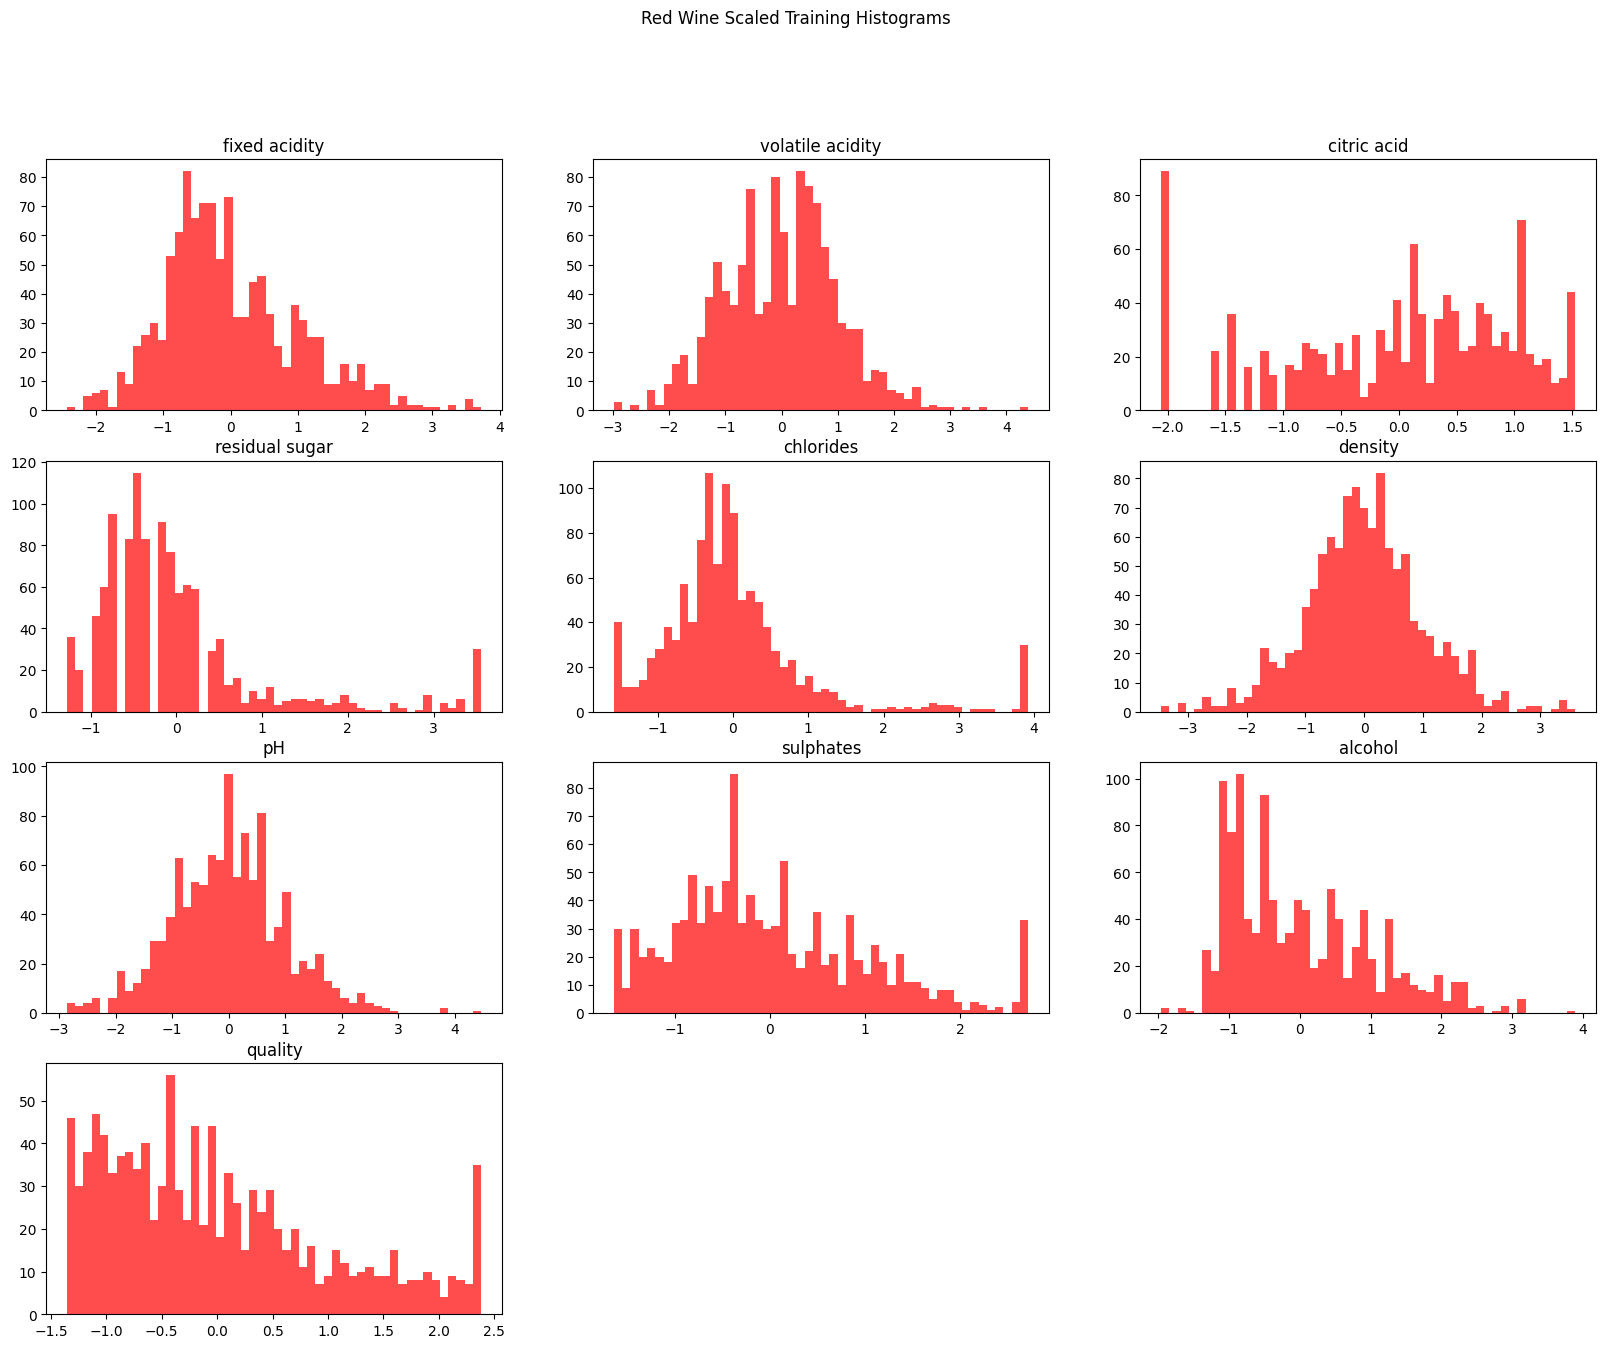

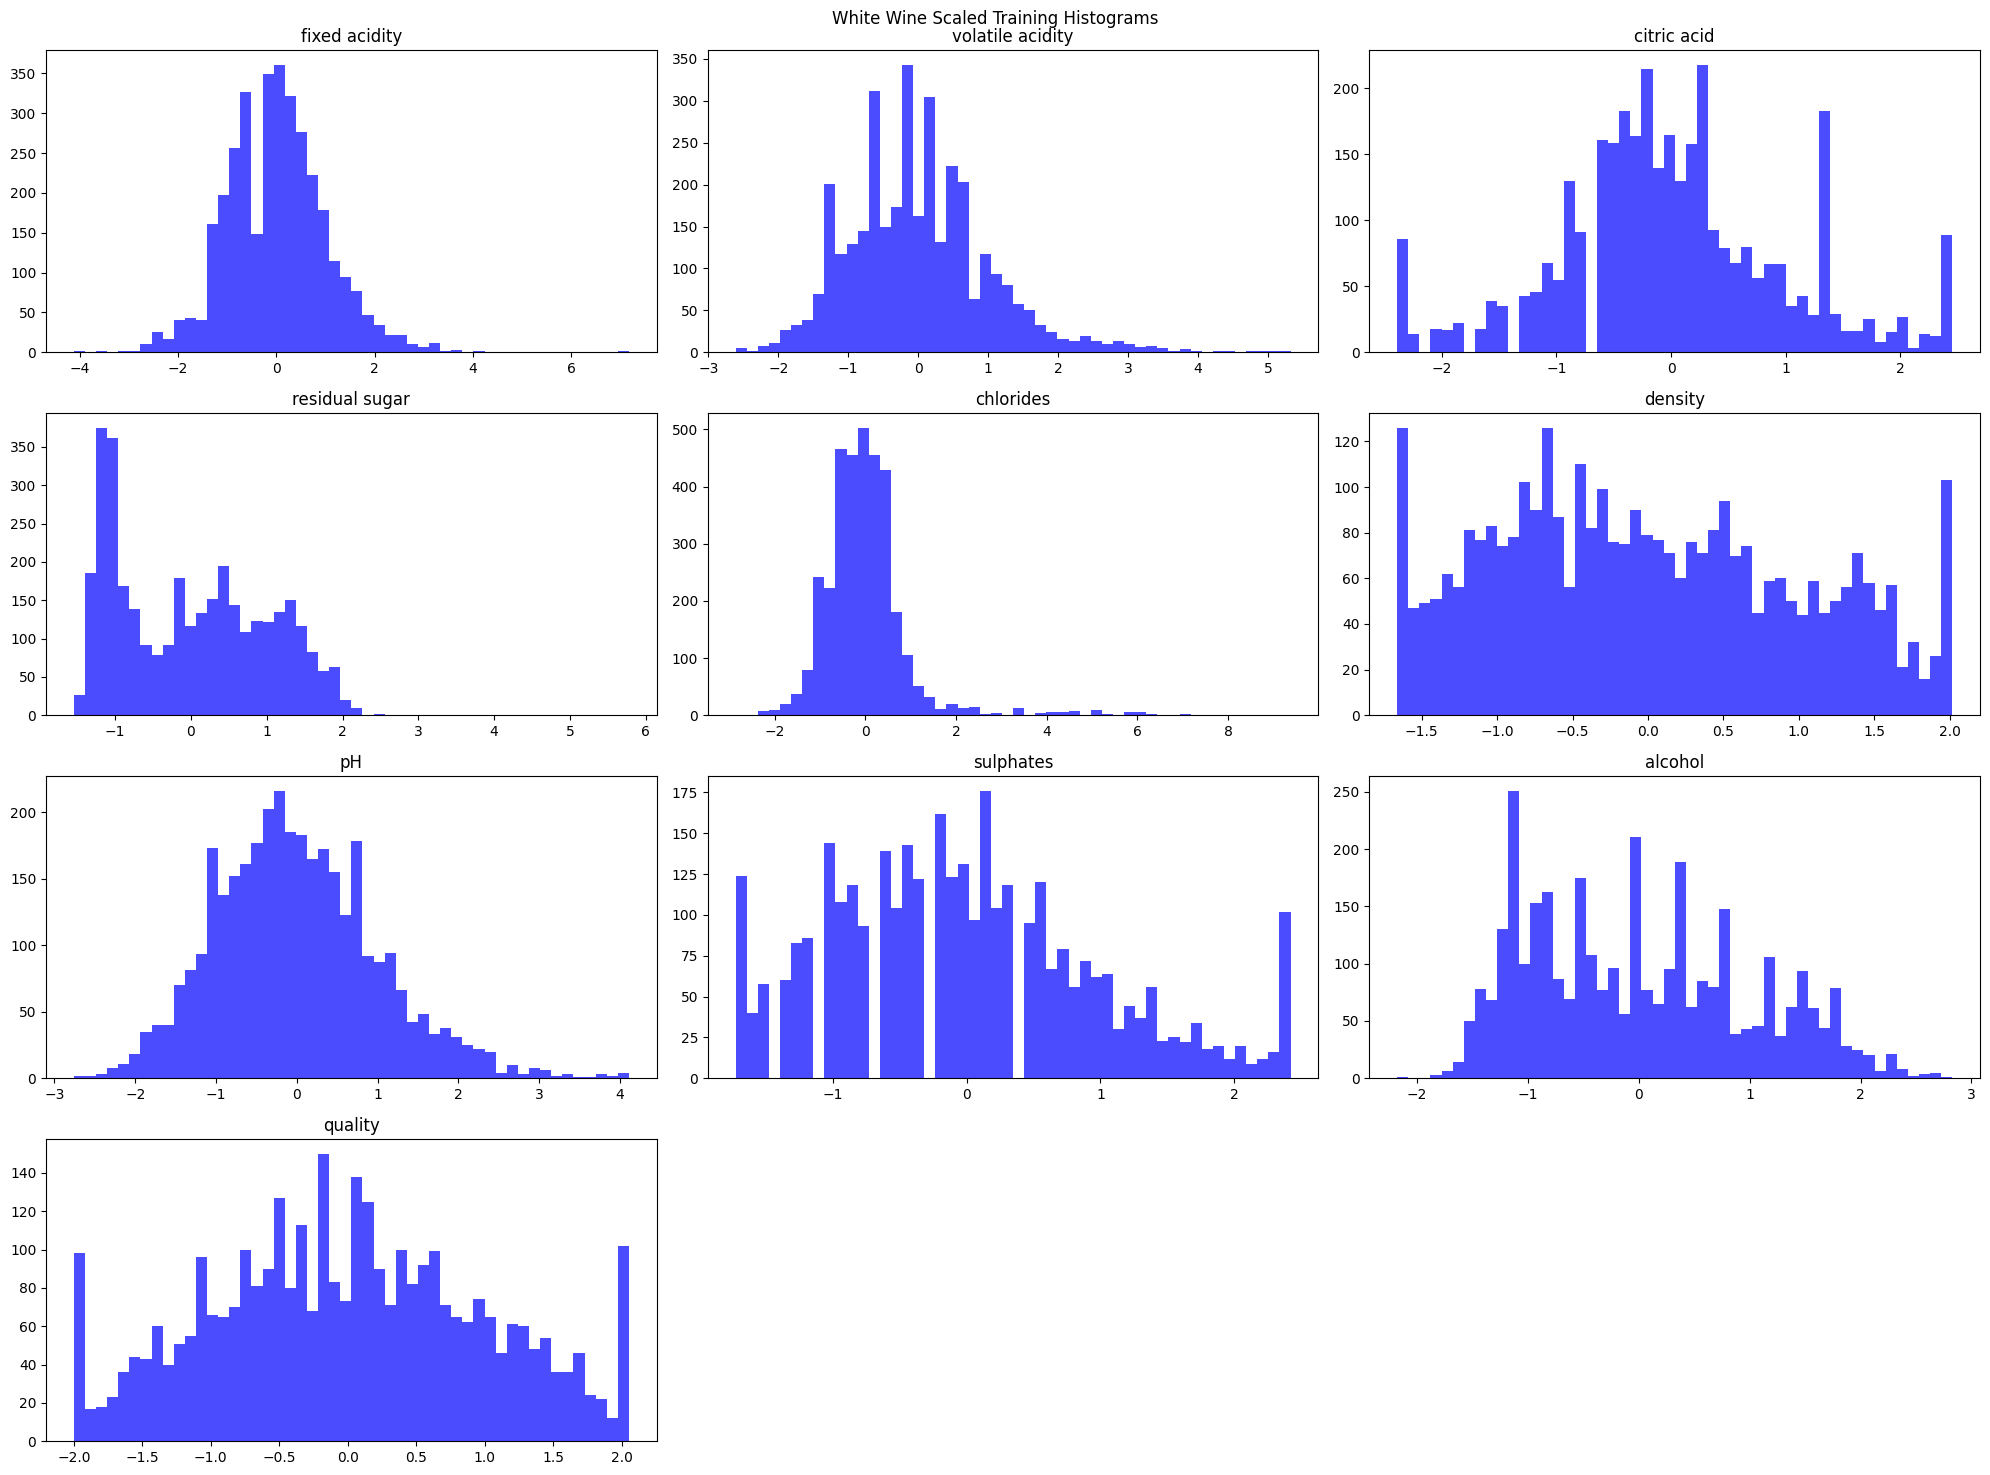

In [ ]:
# Plotting histograms for scaled features

# Since we are dealing with a numpy array this time, the .hist function used with Pandas dataframes previously won't work.
# Instead, we iterate through the columns to create histograms

# Create a figure to hold the red wine histograms
plt.figure(figsize=(20, 15))

for i in range(red_training_features_scaled.shape[1]):
  plt.subplot(4, 3, i + 1)
  plt.hist(red_training_features_scaled[:, i], bins=50, color="red", alpha=0.7)
  plt.title(red_train_set.columns[i])

plt.suptitle("Red Wine Scaled Training Histograms")

# Creating a figure to hold the white wine histograms
plt.figure(figsize=(20, 15))

# Repeat the same process as with red wine
for i in range(white_training_features_scaled.shape[1]):
  plt.subplot(4, 3, i + 1)
  plt.hist(white_training_features_scaled[:, i], bins=50, color="blue", alpha=0.7)
  plt.title(white_train_set.columns[i])

plt.suptitle("White Wine Scaled Training Histograms")
plt.tight_layout()

# Show both figures
plt.show()

Unfortunately the features still seem to be exhibiting some skewness and in some cases hints of multi modality, however, let us try training a variaty of models to see how they perform.

# Model Training

Let's try training a few different models to see how they compare.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(white_training_features_scaled, white_training_labels)

white_wine_lin_predictions = lin_reg.predict(white_training_features_scaled)
white_wine_lin_predictions[:5]
lin_rmse = mean_squared_error(white_training_labels, white_wine_lin_predictions, squared=False)
lin_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.745101160579622

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(white_training_features_scaled, white_training_labels)

white_wine_tree_predictions = tree_reg.predict(white_training_features_scaled)

tree_rmse = mean_squared_error(white_training_labels, white_wine_predictions, squared=False)
tree_rmse

tree_rmses = -cross_val_score(tree_reg, white_training_features_scaled, white_training_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tree_rmses).describe()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,0
count,10.000000
mean,0.852164
std,0.049562
min,0.779864
25%,0.804794
50%,0.861350
75%,0.889187
max,0.919500


In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(white_training_features_scaled, white_training_labels)

forest_rmses = -cross_val_score(forest_reg, white_training_features_scaled, white_training_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(forest_rmses).describe()


,0
count,10.000000
mean,0.626271
std,0.034424
min,0.549855
25%,0.608615
50%,0.639184
75%,0.647229
max,0.660676


In [ ]:
white_svr_model = SVR(kernel="rbf")
white_svr_model.fit(white_training_features_scaled, white_training_labels)

white_svr_rmses = -cross_val_score(white_svr_model, white_training_features_scaled, white_training_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(white_svr_rmses).describe()

,0
count,10.000000
mean,0.705382
std,0.033297
min,0.653800
25%,0.680009
50%,0.712531
75%,0.729009
max,0.748331


In [ ]:
white_nn_model = MLPRegressor(hidden_layer_sizes=(50, 25), activation="relu", solver="adam", random_state=42, learning_rate_init=0.005, max_iter=300)
white_nn_model.fit(white_training_features_scaled, white_training_labels)

white_nn_rmses = -cross_val_score(white_nn_model, white_training_features_scaled, white_training_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(white_nn_rmses).describe()

,0
count,10.000000
mean,0.717740
std,0.041802
min,0.638583
25%,0.694525
50%,0.728175
75%,0.747071
max,0.774788


The random forest regressor seems to provide a relatively reasonable prediction. However, let's try to improve its accuracy and consistency by finding more optimal parameters.

In [ ]:
params_to_test = {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4], "max_features": ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=params_to_test, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
grid_search.fit(white_training_features_scaled, white_training_labels)

best_params = grid_search.best_params_

print("Identified hyperparameter optimizations: ", best_params)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py",

Identified hyperparameter optimizations:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


While we did encounter some issues during the test above, let's try running the random forest regressor with the identified hyperparameters.

In [ ]:
tweaked_forest_reg = RandomForestRegressor(random_state=42, max_depth= None, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=300)
tweaked_forest_reg.fit(white_training_features_scaled, white_training_labels)

tweaked_forest_rmses = -cross_val_score(tweaked_forest_reg, white_training_features_scaled, white_training_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(tweaked_forest_rmses).describe()


,0
count,10.000000
mean,0.617253
std,0.030999
min,0.547004
25%,0.602531
50%,0.624581
75%,0.642131
max,0.646060


Using the tweaked hyperparameters we see a very slight improvement in model's performance. Let's try to run the model on the validation set to see how the hyperparameters perform outside of the training set.

In [ ]:
validation_predictions = tweaked_forest_reg.predict(white_validation_features_scaled)

validation_rmses = -cross_val_score(tweaked_forest_reg, white_training_features_scaled, white_training_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(validation_rmses).describe()

,0
count,10.000000
mean,0.617253
std,0.030999
min,0.547004
25%,0.602531
50%,0.624581
75%,0.642131
max,0.646060


It looks like the model produces very similar results on the validation set when compared with the training set, which indicates that it should generalize well. Given that the model is attempting to predict somewhat subjective sensory evaluations, a mean of 0.62 (which is roughly a 15% deviation on a -2 to 2 scale, as is the case for the white wine target) seems like a reasonable outcome.

Let's follow the same procedure for training a model for the red wine data set.

In [ ]:
params_to_test = {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4], "max_features": ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=params_to_test, scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1)
grid_search.fit(red_training_features_scaled, red_training_labels)

best_params = grid_search.best_params_

print("Identified hyperparameter optimizations: ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Identified hyperparameter optimizations:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Once again we get some errors while looking for optimal hyperparameters, but let's implement these and see how they do on the validation set.

In [ ]:
red_forest_reg = RandomForestRegressor(random_state=42, max_depth= None, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=300)
red_forest_reg.fit(red_training_features_scaled, red_training_labels)

red_forest_rmses = -cross_val_score(forest_reg, red_training_features_scaled, red_training_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(red_forest_rmses).describe()



,0
count,10.000000
mean,0.606953
std,0.048606
min,0.526834
25%,0.593536
50%,0.604252
75%,0.623562
max,0.699901


In [ ]:
validation_predictions = red_forest_reg.predict(red_validation_features_scaled)

red_validation_rmses = -cross_val_score(red_forest_reg, red_training_features_scaled, red_training_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(red_validation_rmses).describe()

,0
count,10.000000
mean,0.592424
std,0.050466
min,0.524326
25%,0.555220
50%,0.589637
75%,0.608752
max,0.686156


It looks like the model performs fairly well on the red wine data set, too. Let us move on and run some final tests to evaluate the model's performance on the test set.

# Model Evaluation

In [ ]:
# Preparing the test data
X_test_white = white_test_features_scaled
Y_test_white = white_test_labels.copy()

X_test_red = red_test_features_scaled
Y_test_red = red_test_labels.copy()

# Generating the predictions
final_white_predictions = tweaked_forest_reg.predict(X_test_white)
final_red_predictions = red_forest_reg.predict(X_test_red)

# Computing the MSE
final_white_rmse = mean_squared_error(Y_test_white, final_white_predictions, squared=False)
final_red_rmse = mean_squared_error(Y_test_red, final_red_predictions, squared=False)
print(final_white_rmse)
print(final_red_rmse)

# Outputting a confidence interval
confidence = 0.95
squared_errors_white = (final_white_predictions - Y_test_white) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors_white) - 1, loc=squared_errors_white.mean(), scale=stats.sem(squared_errors_white)))

squared_errors_red = (final_red_predictions - Y_test_red) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors_red) - 1, loc=squared_errors_red.mean(), scale=stats.sem(squared_errors_red)))

0.6723307178050906
0.5650390841938872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


array([0.45706693, 0.65546026])

Given the scales of the target variables and the mean squared error for white wine and red wine respectively, the model(s) seem to predict the wine's quality with an error margin of roughly 14-17%.